In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

# Categorical Maker

In [2]:
def CategoricalConverter(column):
    onehotencoder = OneHotEncoder()
    prod = onehotencoder.fit_transform(pd.DataFrame(column)).toarray() # Convertir a categórico
    prod = pd.DataFrame(prod, columns = np.sort(column.unique())) #Hacer un df con columnas
    return prod
def OneZero(x):
    if x >=1:
        x = 1
    else:
        x = 0
    return x

# Campañas

In [3]:
cmp = pd.read_csv('../Bases/Campanas_train.csv')
cmp.drop(['Unnamed: 0' , 'Id_Producto' , 'Tipo'] , axis = 1 , inplace = True)

In [4]:
cmp

,id,Producto-Tipo,Fecha_Campaña,Periodo,Resultado,Canal,Duracion_Campaña
0,1,A-A,2020-01-02,202001,0,B,1
1,1,B-B,2020-01-21,202001,0,C,1
2,1,A-A,2020-02-03,202002,0,B,1
3,1,B-B,2020-02-18,202002,0,C,1
4,1,A-A,2020-03-02,202003,0,B,1
...,...,...,...,...,...,...,...
493323,79539,B-B,2020-01-28,202001,0,C,1
493324,79539,C-D,2020-07-20,202007,0,C,1
493325,79539,A-A,2020-07-01,202007,0,B,1
493326,79539,B-B,2020-04-08,202004,0,C,1


# EDA Campañas

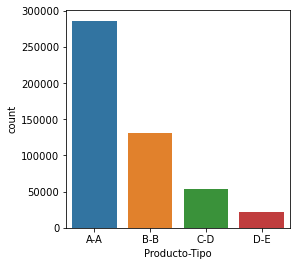

In [5]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'Producto-Tipo' , data = cmp)

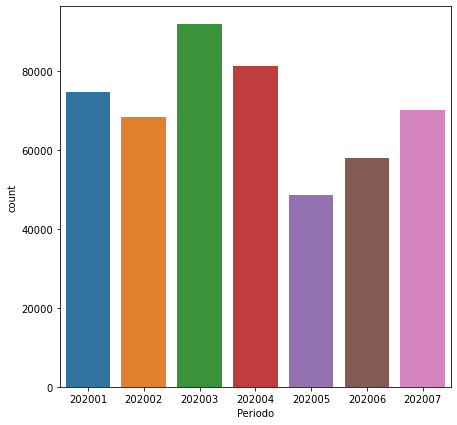

In [6]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'Periodo' , data = cmp)

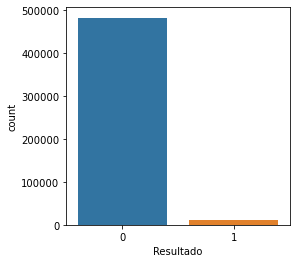

In [7]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'Resultado' , data = cmp)

# Limpieza Campaña

In [8]:
cmp2 = cmp.copy()

In [9]:
prod = CategoricalConverter(cmp2['Producto-Tipo'])
canal = CategoricalConverter(cmp2['Canal'])
cmpnew2 = pd.concat([cmp2,prod, canal], axis=1, sort=False)
cmpnew2.drop(['Producto-Tipo' , 'Fecha_Campaña' , 'Canal' , 'Duracion_Campaña' , 'C'] , axis = 1 , inplace = True)
cmpnew2 = cmpnew2.rename(columns = {'A-A': 'CampAA' ,
                                  'B-B': 'CampBB',
                                  'C-D': 'CampCD' ,
                                  'D-E': 'CampDE',
                                  'B':'Canal'})

In [10]:
cmpnew2.head()

,id,Periodo,Resultado,CampAA,CampBB,CampCD,CampDE,Canal
0,1,202001,0,1.0,0.0,0.0,0.0,1.0
1,1,202001,0,0.0,1.0,0.0,0.0,0.0
2,1,202002,0,1.0,0.0,0.0,0.0,1.0
3,1,202002,0,0.0,1.0,0.0,0.0,0.0
4,1,202003,0,1.0,0.0,0.0,0.0,1.0


In [11]:
cmpnew2 = cmpnew2.groupby(['id' , 'Periodo']).sum()

In [12]:
cmpnew2.reset_index(inplace = True)

In [13]:
cmpnew2['Key'] = cmpnew2['id'].apply(str) + "-" + cmpnew2['Periodo'].apply(str)

In [14]:
cmpnew2

,id,Periodo,Resultado,CampAA,CampBB,CampCD,CampDE,Canal,Key
0,1,202001,0,1.0,1.0,0.0,0.0,1.0,1-202001
1,1,202002,0,1.0,1.0,0.0,0.0,1.0,1-202002
2,1,202003,0,1.0,0.0,0.0,0.0,1.0,1-202003
3,1,202004,0,0.0,1.0,0.0,0.0,0.0,1-202004
4,1,202006,0,0.0,1.0,0.0,0.0,0.0,1-202006
...,...,...,...,...,...,...,...,...,...
360478,79539,202001,0,1.0,1.0,0.0,0.0,1.0,79539-202001
360479,79539,202002,0,1.0,0.0,0.0,0.0,1.0,79539-202002
360480,79539,202003,0,1.0,0.0,0.0,0.0,1.0,79539-202003
360481,79539,202004,0,0.0,1.0,0.0,0.0,0.0,79539-202004


In [15]:
#cmpnew2.to_pickle('CampanaTraining.pkl')

# Comunicaciones

In [3]:
com = pd.read_csv('../Test Data/Comunicaciones_test.csv')
com.drop(['Unnamed: 0' , 'Id_Producto' , 'Tipo'] , axis = 1 , inplace = True)

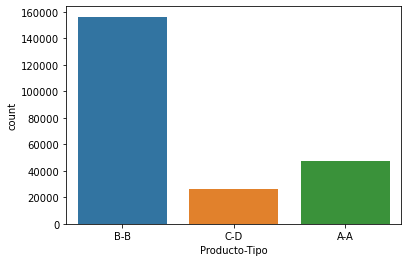

In [4]:
sns.countplot(x = 'Producto-Tipo' , data = com)

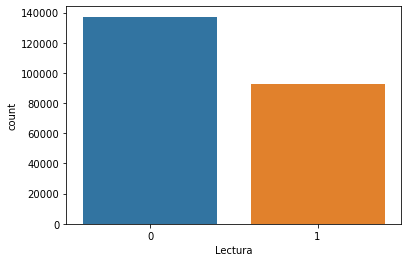

In [5]:
sns.countplot(x = 'Lectura' , data = com)

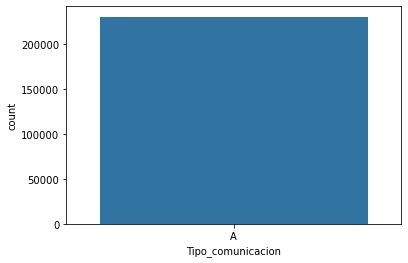

In [6]:
sns.countplot(x = 'Tipo_comunicacion' , data = com) # Borrar tipo Comunicacion

In [7]:
com.head(2)

,id,Producto-Tipo,Tipo_comunicacion,Fecha,Periodo,Lectura
0,1,B-B,A,2020-08-07,202008,1
1,1,B-B,A,2020-08-27,202008,1


# Limpieza Comunicaciones

In [8]:
com2 = com.copy()

In [9]:
prod = CategoricalConverter(com['Producto-Tipo'])
comnew2 = pd.concat([com2 ,prod], axis=1, sort=False)
comnew2.drop(['Producto-Tipo' , 'Tipo_comunicacion' , 'Fecha'] , axis = 1 , inplace = True)
comnew2 = comnew2.rename(columns = {'A-A': 'ComAA' ,
                                  'B-B': 'ComBB',
                                  'C-D': 'ComCD' ,
                                  'D-E': 'ComDE',
                                  'E-E' : 'ComEE'})
comnew2 = comnew2.groupby(['id' , 'Periodo']).sum()
comnew2.reset_index(inplace = True)

In [10]:
comnew2.head()

,id,Periodo,Lectura,ComAA,ComBB,ComCD
0,1,202008,2,0.0,2.0,0.0
1,1,202009,0,0.0,1.0,0.0
2,1,202010,1,0.0,2.0,0.0
3,2,202008,1,0.0,0.0,1.0
4,2,202009,1,0.0,0.0,1.0


In [11]:
comnew2id = comnew2['id']
comnew2period = comnew2['Periodo']
comnew2.drop(['id' , 'Periodo'] , axis = 1 , inplace = True)
def test(x):
    if x>0:
        x = 1
    else:
        x = 0
    return x
for i in comnew2.columns.values:
    comnew2[i] = comnew2[i].apply(test)
comnew2['id'] = comnew2id
comnew2['Periodo'] = comnew2period

In [12]:
comnew2.head()

,Lectura,ComAA,ComBB,ComCD,id,Periodo
0,1,0,1,0,1,202008
1,0,0,1,0,1,202009
2,1,0,1,0,1,202010
3,1,0,0,1,2,202008
4,1,0,0,1,2,202009


In [13]:
comnew2 = comnew2.groupby('id').sum()

In [14]:
comnew2.drop('Periodo' , axis = 1 , inplace = True)

In [15]:
for i in comnew2.columns.values:
    comnew2[i] = comnew2[i].apply(OneZero)

In [16]:
comnew2.reset_index(inplace = True)

In [17]:
comnew2

,id,Lectura,ComAA,ComBB,ComCD
0,1,1,0,1,0
1,2,1,0,1,1
2,3,1,0,1,0
3,4,1,0,0,1
4,5,1,0,1,0
...,...,...,...,...,...
64301,79535,1,0,1,0
64302,79536,0,0,1,0
64303,79537,0,0,1,1
64304,79538,1,0,1,0


In [18]:
comnew2.to_pickle('ComunicacionesTestGlobal.pkl')

# Consumidores

In [71]:
csm = pd.read_csv('../Bases/Consumidores.csv')
csm.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [72]:
csm.head()

,Edad,Sexo,Renta,Recibe_sueldo_en_cuenta,Segmento_consumidor,Meses_antiguedad,Comuna,Ciudad,Estado_civil,Principalidad,Profesion,id
0,Mayor a 70,1,R1,0,A,Mayor a 10 años,331.0,13.0,D,B,P164,1
1,Mayor a 70,1,R9,0,B,Mayor a 10 años,37.0,5.0,D,E,P164,2
2,Mayor a 70,1,R9,1,B,Mayor a 10 años,19.0,4.0,B,D,P114,3
3,Mayor a 70,1,R10,0,B,Mayor a 10 años,37.0,5.0,B,C,P164,4
4,Mayor a 70,1,R4,0,A,Mayor a 10 años,91.0,13.0,D,B,P85,5


[Text(0, 0, 'Mayor a 10 años'),
 Text(0, 0, 'Entre 9 y 10 años'),
 Text(0, 0, 'Entre 8 y 9 años'),
 Text(0, 0, 'Menos de 1 año'),
 Text(0, 0, 'Entre 2 y 3 años'),
 Text(0, 0, 'Entre 7 y 8 años'),
 Text(0, 0, 'Entre 5 y 6 años'),
 Text(0, 0, 'Entre 6 y 7 años'),
 Text(0, 0, 'Entre 3 y 4 años'),
 Text(0, 0, 'Entre 4 y 5 años'),
 Text(0, 0, 'Entre 1 y 2 años')]

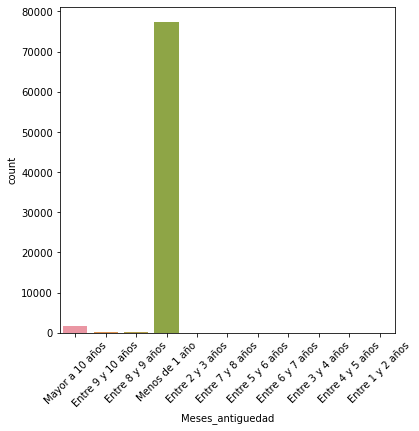

In [74]:
plt.figure(figsize = (6,6))
chart = sns.countplot(x = 'Meses_antiguedad' , data = csm) # NO USAR
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Mayor a 70'),
 Text(0, 0, 'Entre 65 y 70'),
 Text(0, 0, 'Entre 55 y 60'),
 Text(0, 0, 'Entre 60 y 65'),
 Text(0, 0, 'Entre 50 y 55'),
 Text(0, 0, 'Menor a 25'),
 Text(0, 0, 'Entre 45 y 50'),
 Text(0, 0, 'Entre 25 y 30'),
 Text(0, 0, 'Entre 35 y 40'),
 Text(0, 0, 'Entre 40 y 45'),
 Text(0, 0, 'Entre 30 y 35')]

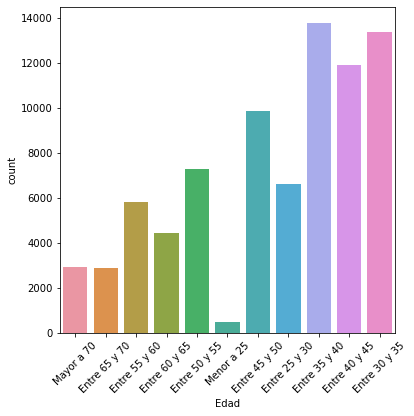

In [75]:
plt.figure(figsize = (6,6))
chart = sns.countplot(x = 'Edad' , data = csm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'R1'),
 Text(0, 0, 'R9'),
 Text(0, 0, 'R10'),
 Text(0, 0, 'R4'),
 Text(0, 0, 'R5'),
 Text(0, 0, 'R11'),
 Text(0, 0, 'R2'),
 Text(0, 0, 'R3'),
 Text(0, 0, 'R15'),
 Text(0, 0, 'R6'),
 Text(0, 0, 'R14'),
 Text(0, 0, 'R12'),
 Text(0, 0, 'R7'),
 Text(0, 0, 'R8'),
 Text(0, 0, 'R21'),
 Text(0, 0, 'R17'),
 Text(0, 0, 'R13'),
 Text(0, 0, 'R20'),
 Text(0, 0, 'R16'),
 Text(0, 0, 'R18'),
 Text(0, 0, 'R19')]

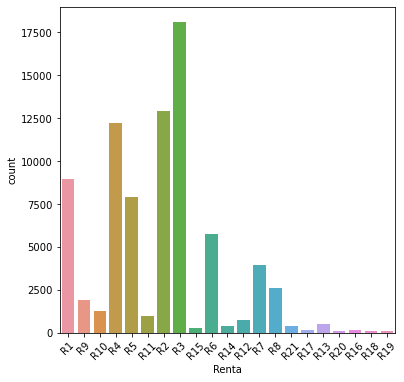

In [76]:
plt.figure(figsize = (6,6))
chart = sns.countplot(x = 'Renta' , data = csm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, '0'), Text(0, 0, '1')]

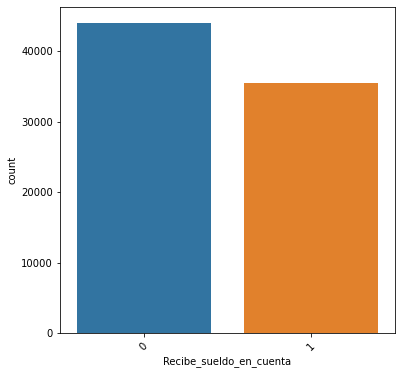

In [77]:
plt.figure(figsize = (6,6))
chart = sns.countplot(x = 'Recibe_sueldo_en_cuenta' , data = csm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'A'), Text(0, 0, 'B')]

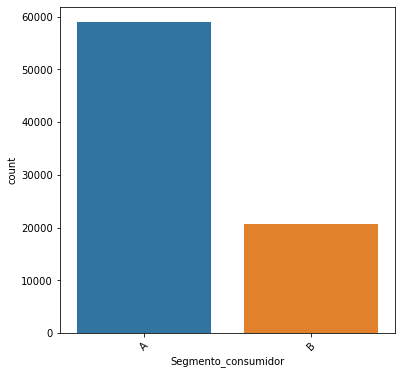

In [78]:
plt.figure(figsize = (6,6))
chart = sns.countplot(x = 'Segmento_consumidor' , data = csm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'B'),
 Text(0, 0, 'E'),
 Text(0, 0, 'D'),
 Text(0, 0, 'C'),
 Text(0, 0, 'A'),
 Text(0, 0, 'F'),
 Text(0, 0, 'G')]

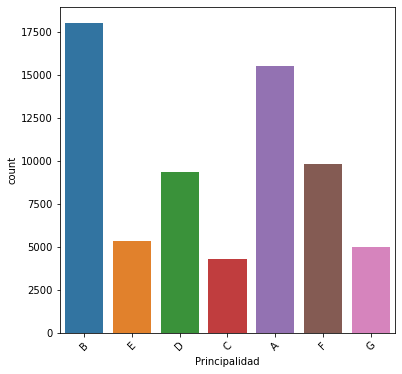

In [79]:
plt.figure(figsize = (6,6))
chart = sns.countplot(x = 'Principalidad' , data = csm)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [80]:
csm2 = csm.copy()

In [84]:
csm2.drop(['Meses_antiguedad' , 'Estado_civil' , 'Comuna' , 'Ciudad' ,'Estado_civil', 'Profesion' , 'Principalidad'] , axis = 1 , inplace = True)

In [85]:
csm2.isnull().sum()

Edad                       0
Sexo                       0
Renta                      0
Recibe_sueldo_en_cuenta    0
Segmento_consumidor        0
id                         0
dtype: int64

In [86]:
csm2

,Edad,Sexo,Renta,Recibe_sueldo_en_cuenta,Segmento_consumidor,id
0,Mayor a 70,1,R1,0,A,1
1,Mayor a 70,1,R9,0,B,2
2,Mayor a 70,1,R9,1,B,3
3,Mayor a 70,1,R10,0,B,4
4,Mayor a 70,1,R4,0,A,5
...,...,...,...,...,...,...
79534,Entre 30 y 35,0,R2,0,A,79535
79535,Entre 35 y 40,0,R1,0,A,79536
79536,Entre 50 y 55,1,R1,0,A,79537
79537,Entre 45 y 50,0,R2,0,A,79538


In [90]:
edad = CategoricalConverter(csm2['Edad'])
renta = CategoricalConverter(csm2['Renta'])
sc = CategoricalConverter(csm2['Segmento_consumidor'])
csmnew = pd.concat([csm2 ,edad, renta , sc], axis=1, sort=False)

In [91]:
csmnew.drop(['B' , 'Edad' , 'Renta' , 'Segmento_consumidor'], axis = 1 , inplace = True)

In [92]:
csmnew = csmnew.rename(columns = {'A': 'SegmentoConsumidor'})

In [93]:
csmnew.head()

,Sexo,Recibe_sueldo_en_cuenta,id,Entre 25 y 30,Entre 30 y 35,Entre 35 y 40,Entre 40 y 45,Entre 45 y 50,Entre 50 y 55,Entre 55 y 60,...,R20,R21,R3,R4,R5,R6,R7,R8,R9,SegmentoConsumidor
0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [94]:
csmnew.to_pickle('Consumidores.pkl')

## ¿Borrar o no borrar principalidad?